étudiant : SAKR Mohamed Walid

étudiant : FEZAI Yousri

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data_3classes(n1,n2,n3, display=True):
    X1 = np.random.randn(n1,2)*0.15 - np.array([0.2 , 0.2])
    X2 = np.random.randn(n2,2)*0.25 + np.array([0.1 , 0.5])
    X3 = np.random.randn(n3,2)*0.15 + np.array([0.6 , 0.2])
    X = np.concatenate((X1,X2,X3), axis=0)
    Y = np.concatenate([np.ones(n1), np.ones(n2)*2, np.ones(n3)*3])-1

    if display:
        plt.figure()
        plt.plot(X1[:,0], X1[:,1], '.r')
        plt.plot(X2[:,0], X2[:,1], '.g')
        plt.plot(X3[:,0], X3[:,1], '.b')
        plt.show()

    return X,Y

#Converts a class vector (integers) to binary class matrix (copy from keras)
def to_categorical(y, num_classes=None, dtype="float32"):
    y = np.array(y, dtype="int")
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

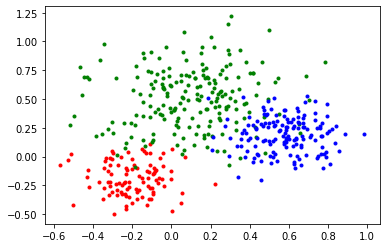

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [3]:
X_train, Y_train = generate_data_3classes(100, 200, 150)
Y_cat = to_categorical(Y_train)

K=Y_cat.shape[1] #nombre de classes
(num_examples,D) = X_train.shape # nombre d'exemples et dimension des exemples
Y_cat

In [4]:
# fonction sigmoide
def sigmo(v):
	return 1/(1+np.exp(-v))

# dérivée de la fonction sigmoide
def sigmop(v):
	return sigmo(v)*(1-sigmo(v))

In [5]:
# fonction d'initialisation aléatoire des poids
def initialisation(D,K):
  W = 1 * np.random.normal(size=(D,K))
  b = np.zeros((1,K))
  return (W,b)


In [6]:
# fonction loss
def MSE_loss(y_cat,y):
  err = y - y_cat
  return np.sum(err**2)

In [7]:
def gradient(X,v,err):
    dL_W =  np.dot(X.T,2*err*sigmop(v))
    dL_b =  np.sum(2*err*sigmop(v),axis = 0)
    return (dL_W, dL_b)

In [8]:
# Fonction de  mise à jour
def update(dL_W, dL_b, W, b, step_size):
    W -= step_size*dL_W
    b -= step_size*dL_b
    return (W,b)


In [9]:
def model(X,W,b):
  v = X.dot(W) + np.ones((X.shape[0],1))*b
  return v

In [34]:
def accuracy(X,W,b,Y):
  Y_pred = sigmo(X.dot(W)+np.ones((Y.shape[0],1))*b)
  class_pred = np.argmax(Y_pred,axis =1)
  class_pred.reshape(Y_pred.shape[0],1)
  acc = np.mean(class_pred == Y)
  return acc

def accurancy_2c(X,W,b,Y,W2,b2):
  Y_pred1 = sigmo(X.dot(W)+np.ones((Y.shape[0],1))*b)
  Y_pred = sigmo(Y_pred1.dot(W2)+np.ones((Y.shape[0],1))*b2)
  class_pred = np.argmax(Y_pred,axis=1)
  acc = np.mean(class_pred == Y)
  return acc


In [11]:
# paramètres de l'apprentissage
step_size = 0.1
num_iter = 10000

In [12]:
def artificial_neuron (X_train, Y_train,X_test,Y_test,step_size,num_iter):

  Y_cat = to_categorical(Y_train)
  Y_cat_test = to_categorical(Y_test)
  K=Y_cat.shape[1] #nombre de classes
  (num_examples,D) = X_train.shape # nombre d'exemples et dimension des exemples


  #initialisation W et b
  W, b = initialisation(D,K)
  loss = []
  loss_test = []
  acc = []
  acc_test = []

  #boucle d'apprentissage
  for i in range(num_iter):
    #propagation
    v = model(X_train,W,b)
    #fonction d'activation
    y = sigmo(v)
    err = y - Y_cat
    loss.append(MSE_loss(Y_cat,y))
    acc.append(accuracy(X_train,W,b,Y_train))

    #test
    v_test = model(X_test,W,b) 
    y_test = sigmo(v_test)
    err_test = y_test - Y_cat_test
    loss_test.append(MSE_loss(Y_cat_test,y_test))
    acc_test.append(accuracy(X_test,W,b,Y_test))

    if i % 1000 == 0:   
        print('iteration {}: loss {}'.format(i, loss[-1]))


    #retro-propagation

    dL_W, dL_b = gradient(X_train,v,err)

    W,b = update(dL_W, dL_b, W, b, step_size)

    # visualisation

  plt.figure(figsize=(12,12))

  
  plt.subplot(2, 2, 1)
  plt.title ("Loss")
  plt.plot(loss, label =" Train")
  plt.plot(loss_test, label =" Test")
  plt.xlabel("itérations")
  plt.ylabel("Loss")
  plt.legend()

  
  plt.subplot(2, 2, 2)
  plt.title ("Accuracy")
  plt.plot(acc, label =" Train")
  plt.plot(acc_test, label =" Test")
  plt.xlabel("itérations")
  plt.ylabel("Accuracy")
  plt.legend()

  plt.subplot(2, 2, 3)
  plt.title ("Loss zoom")
  plt.plot(loss[1:], label =" Train")
  plt.plot(loss_test, label =" Test")
  plt.xlim([-20,700])
  plt.xlabel("itérations")
  plt.ylabel("Loss")
  plt.legend()

  plt.subplot(2, 2, 4)
  plt.title ("Jeu de test indépendant")
  plt.plot(X_test[:8,0], X_test[:8,1], '.r')
  plt.plot(X_test[8:18,0], X_test[8:18,1], '.g')
  plt.plot(X_test[18:27,0], X_test[18:27,1], '.b')
  x0 = np.linspace(-0.5,1,100)
  x1 = (-W[0,0]*x0 -b[0,0] )/W[1,0]
  x2= (-W[0,1]*x0 -b[0,1] )/W[1,1]
  x3= (-W[0,2]*x0 -b[0,2] )/W[1,2]
  plt.plot(x0,x1,'r')
  plt.plot(x0,x2,'g')
  plt.plot(x0,x3,'b')
  plt.show()

  return (W,b,loss[-1],acc[-1],acc_test[-1])





In [ ]:
#Jeu de test indépendant
X_test, Y_test = generate_data_3classes(8, 10, 9)

iteration 0: loss 282.4213149604094
iteration 1000: loss 72.757679137313
iteration 2000: loss 72.7497015677113
iteration 3000: loss 72.7494827393104
iteration 4000: loss 72.7494754129811
iteration 5000: loss 72.74947515513321
iteration 6000: loss 72.74947514584355
iteration 7000: loss 72.74947514550328
iteration 8000: loss 72.74947514549065
iteration 9000: loss 72.74947514549017


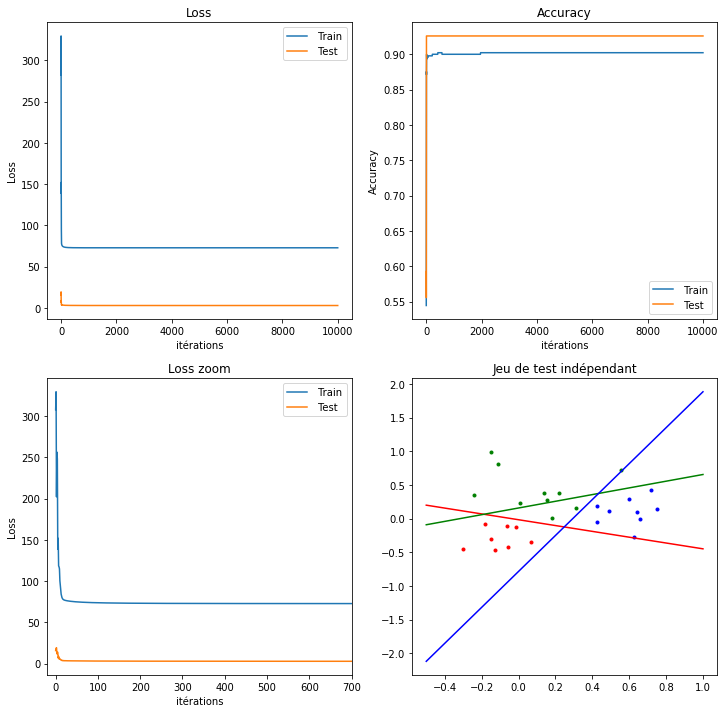

In [ ]:
W, b ,loss, acc, acc_test= artificial_neuron (X_train, Y_train,X_test,Y_test,step_size,num_iter)

In [ ]:
# Calcul de la précision
print("Training accuracy = ",acc)
print("Test accuracy = ", acc_test)

Training accuracy =  0.9022222222222223
Test accuracy =  0.9259259259259259


On remarque qu'on a un bon taux d'accuracy qui est différent de 1 donc on est pas en overfitting.

L'accuracy est de 93% ce qui est lisible aussi sur le graphe ou retouve 2 exemple parmi 27 qui ont étais mal classés.

Pour aller plus loin : 
- code d'évaluation des performances (et de visualisation)
- création d'un jeu de test indépendant (performance en généralisation)
- ajouter une couche cachée (observer les gains en performance et les frontières de décision)


**Ajouter une couche cachée**

In [17]:
def gradient2(X,v,v2,err,W):
    dZ1 = 2*err*sigmop(v2)
    dZ2 = np.dot((dZ1*sigmop(v)),W)

    dL_W =  np.dot(X.T,dZ2)
    dL_b =  np.sum(dZ2, axis = 0)

    dL_W2 =  np.dot(sigmo(v).T,dZ1)
    dL_b2 =  np.sum(dZ1,axis = 0)
    return (dL_W, dL_b ,dL_W2, dL_b2 )

In [35]:
def artificial_neuron2 (X_train, Y_train,X_test,Y_test,step_size,num_iter):

  Y_cat = to_categorical(Y_train)
  Y_cat_test = to_categorical(Y_test)
  K=Y_cat.shape[1] #nombre de classes
  (num_examples,D) = X_train.shape # nombre d'exemples et dimension des exemples
  # nombre de neurones de la 2eme couche
  n = 3
  #initialisation W et b de la premiére couche
  W, b = initialisation(D,K)
  #initialisation de W et b de la deuxieme couche
  W2,b2 = initialisation(n,K)
  loss = []
  loss_test = []
  acc = []
  acc_test = []

  #boucle d'apprentissage
  for i in range(num_iter):
    #propagation
    v = model(X_train,W,b)
    #fonction d'activation
    y = sigmo(v)

    #retro-propagation

    # 2eme couche

    #propagation
    v2 = model(y,W2,b2)
    
    #fonction d'activation
    y2 = sigmo(v2)
    #erreur
    err = y2 - Y_cat
    loss.append(MSE_loss(Y_cat,y2))
    acc.append(accurancy_2c(X_train,W,b,Y_train,W2,b2))
    if i % 1000 == 0:   
        print('iteration {}: loss {}'.format(i, loss[-1]))
    #retro-propagation

    dL_W1, dL_b1, dL_W2, dL_b2  = gradient2(X_train,v,v2,err,W2)

    W,b = update(dL_W1, dL_b1, W, b, step_size)
    W2,b2 = update(dL_W2, dL_b2, W2, b2, step_size)



    # visualisation

  plt.figure(figsize=(12,12))

  
  plt.subplot(2, 2, 1)
  plt.title ("Loss")
  plt.plot(loss, label =" Train")
  plt.xlabel("itérations")
  plt.ylabel("Loss")
  plt.legend()

  
  plt.subplot(2, 2, 2)
  plt.title ("Accuracy")
  plt.plot(acc, label =" Train")
  #plt.plot(acc_test, label =" Test")
  plt.xlabel("itérations")
  plt.ylabel("Accuracy")
  plt.legend()

  plt.subplot(2, 2, 3)
  plt.title ("Loss zoom")
  plt.plot(loss[1:], label =" Train")
  #plt.plot(loss_test, label =" Test")
  plt.xlim([-20,700])
  plt.xlabel("itérations")
  plt.ylabel("Loss")
  plt.legend()

  plt.subplot(2, 2, 4)
  plt.title ("Jeu de test indépendant")
  plt.plot(X_test[:8,0], X_test[:8,1], '.r')
  plt.plot(X_test[8:18,0], X_test[8:18,1], '.g')
  plt.plot(X_test[18:27,0], X_test[18:27,1], '.b')
  x0 = np.linspace(-0.5,1,100)
  x1 = (-W[0,0]*x0 -b[0,0] )/W[1,0]
  x2= (-W[0,1]*x0 -b[0,1] )/W[1,1]
  x3= (-W[0,2]*x0 -b[0,2] )/W[1,2]
  plt.plot(x0,x1,'r')
  plt.plot(x0,x2,'g')
  plt.plot(x0,x3,'b')
  plt.show()

  return (W2,b2,W,b)

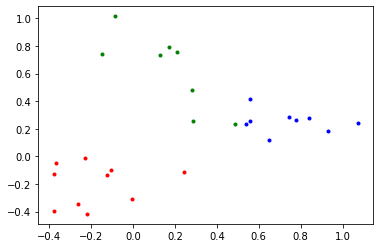

In [20]:
X_test, Y_test = generate_data_3classes(10, 8, 9)
Y_Cat_test = to_categorical(Y_train)

iteration 0: loss 321.2931226295679
iteration 1000: loss 59.538724390292074
iteration 2000: loss 52.364681574635355
iteration 3000: loss 46.83349137019759
iteration 4000: loss 46.45687609893373
iteration 5000: loss 46.317131865343896
iteration 6000: loss 45.96901108009211
iteration 7000: loss 46.13625544640422
iteration 8000: loss 46.495711442663705
iteration 9000: loss 46.75079413362298
iteration 10000: loss 46.86944950748679
iteration 11000: loss 46.868050063945155
iteration 12000: loss 46.76162487873147
iteration 13000: loss 46.575397034814614
iteration 14000: loss 46.341171572856496
iteration 15000: loss 46.08488246471396
iteration 16000: loss 45.82207876631234
iteration 17000: loss 45.56086610954631
iteration 18000: loss 45.30507579646613
iteration 19000: loss 45.05589130721363
iteration 20000: loss 44.81263635862361
iteration 21000: loss 44.57325997310383
iteration 22000: loss 44.334720080287376
iteration 23000: loss 44.093346413739866
iteration 24000: loss 43.84525663696073
iter

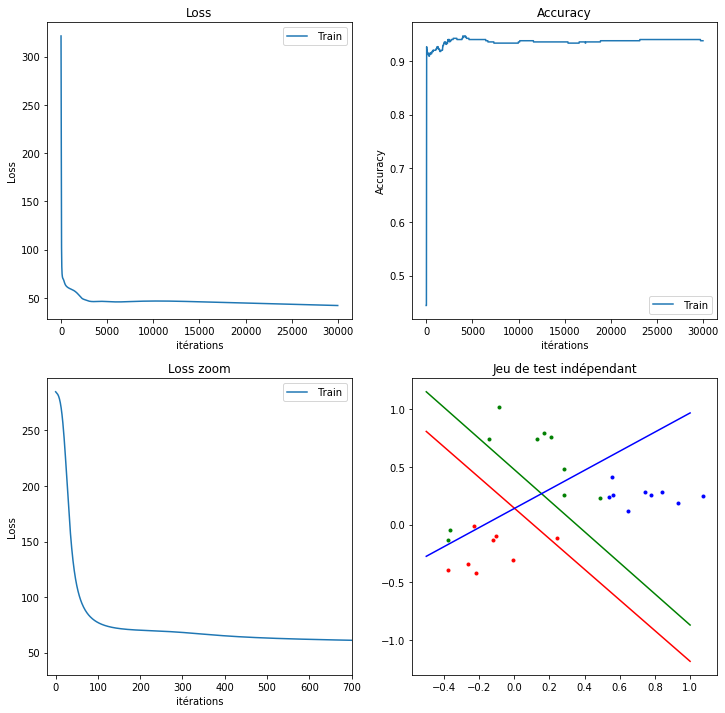

In [37]:
W2,b2,W,b= artificial_neuron2 (X_train, Y_train,X_test,Y_test,0.01,30000)

In [38]:
Y_test_pred1 = sigmo(X_test.dot(W)+np.ones((27,1))*b)
Y_test_pred = sigmo(Y_test_pred1.dot(W2)+np.ones((27,1))*b2)
class_test_pred = np.argmax(Y_test_pred,axis=1)
print('Training accuracy: {:.2}'.format(np.mean(class_test_pred == Y_test)))

Training accuracy: 0.96
